# Good Asian Restaurants in Toronto

## Introduction

* Many Indian people go to Canada on business trips who usually search for Good Asian restaurants where they get good Asian food. 
* Now-a-days Indian people prefer also the other asian countries food than Indian food. Some of the Chinese, Japanese, Thai food items became regular in-takes whenever they visit hotels both within India or other coutries
* And people check the ratings of the hotels before they choose to visit
* The project is to help the people who go on buiness trips to Canada - Toronto to find better staying place which has good Asian restaurans

## Target Audience

* The Indian business people or anyone who is visiting Canada - Toronto for a short term stay
* The audience is not restricted to Indian people but all the visitors of Toronto who are interested in Asian food items
* The visitors who usually refer the ratings of the restaurants before they choose to visit them

## Data

* Wikipedia lists the postal codes of Toronto in the follwing link
  https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
* The datasources will be scraped to obtain the postal codes

## Assumption:
* My project makes an assumption that the most people visits downtowns for the business purposes. And hence after scraping the data in the link above, the filtered data would have only downtowns

## Geographical coordinates:
* To get the geographical coordinates of the neighborhoods using the Geocoder package, the following link is used to pull a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

## Explore the neighborhoods in Toronto using Foursquare API
* Once we have the filetered data and the geographical coordinates, The neighbourhoods of Toronto will be explored using Foursquare places API
https://developer.foursquare.com/places
* The places will be shortlisted for Asian restaurants and would be checked for ratings using Four square API 

## Cluster and visualize the data
* Using k-Means, the relevant neighborhoods are clustered and the folium map will be used to visualize the data
* The suggestions will be given for the better restaurants based on the ratings received through Foursquare Places API

## Part I - Preparing data of Toronto Neighborhoods by scraping data from Wikipedia

### The following code does the importing of required libraries and page scrapes the data for Toronto

In [1]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

     |████████████████████████████████| 122kB 6.5MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 5.9MB/s eta 0:00:01


In [2]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.0.5               |   py36h830a2c2_0        10.1 MB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-

In [3]:
toronto_pc = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
xml_data=BeautifulSoup(toronto_pc,'lxml')
from IPython.display import display_html
postcal_code = str(xml_data.table)

### Cleaning up and processing of  the postal code table

In [11]:
toronto_df = pd.read_html(postcal_code)
to_postal_df=toronto_df[0]
to_postal_df.head()

,Post Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"



## Explore the neighborhoods of Toronoto

### Get the latitude and the longitude coordinates of each neighborhood.

In [12]:
lat_long = pd.read_csv('https://cocl.us/Geospatial_data')
lat_long.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [13]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [8]:
import geocoder

In [14]:
# Dropping the rows with Borough is 'Not assigned'
temp_df = to_postal_df[to_postal_df.Borough != 'Not assigned']

# Combining the neighbourhoods with same Postalcode
to_cleaned_data = temp_df.groupby(['Post Code','Borough'], sort=False).agg(', '.join)
to_cleaned_data.reset_index(inplace=True)

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
to_cleaned_data['Neighborhood'] = np.where(to_cleaned_data['Neighborhood'] == 'Not assigned',to_cleaned_data['Borough'], to_cleaned_data['Neighborhood'])

to_cleaned_data

to_cleaned_data.to_csv("TorontoPostalData.csv")

### Read the Toronto data and find the Latitude, Longitude of the neighborhoods

In [17]:
Toronto_data = pd.read_csv("TorontoPostalData.csv").set_index("Post Code")
Toronto_data.head()
Toronto_data = Toronto_data.drop(["Unnamed: 0"], axis = 1)
#Toronto_data.head()

LatLongData = pd.read_csv("http://cocl.us/Geospatial_data").set_index("Postal Code")

LatLongData.head()
TorontoPostalData = Toronto_data.join(LatLongData)

TorontoPostalData.to_csv("TorontoPostalDataWithCoords.csv")
TorontoPostalData.head()

,Borough,Neighborhood,Latitude,Longitude
Post Code,,,,
M3A,North York,Parkwoods,43.753259,-79.329656
M4A,North York,Victoria Village,43.725882,-79.315572
M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [18]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

### Create a map of Toronto with neighborhoods

In [19]:
address = 'TORONTO, TO'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [81]:
# create map of Toronto using latitude and longitude values
map_TO = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(TorontoPostalData['Latitude'], TorontoPostalData['Longitude'], TorontoPostalData['Borough'], TorontoPostalData['Neighborhood']):
    label = '{}, {}'.format(TorontoPostalData, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#6186dd',
        fill_opacity=0.7,
        parse_html=False).add_to(map_TO)  
    
map_TO

Explore the neighborhoods of Toronto

### Filtering only the places who have Toronto in the name

In [22]:
filtered_data = TorontoPostalData[TorontoPostalData['Borough'].str.contains('Toronto')].reset_index(drop=True)
filtered_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,Downtown Toronto,St. James Town,43.651494,-79.375418
4,East Toronto,The Beaches,43.676357,-79.293031


In [23]:
address = 'DownTown Toronto, TO'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of DownTown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of DownTown Toronto are 43.6541737, -79.38081164513409.


In [82]:
# create map of Down Towns using latitude and longitude values
map_to_dt = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(filtered_data['Latitude'], filtered_data['Longitude'], filtered_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to_dt)  
    
map_to_dt

## Using Foursquare API to explore the neighborhood places

### Filtering only Asian Restaurants in Toronto DownTowns

In [26]:
CLIENT_ID = 'GO0KMNNEEX0J5QGPP2ZG0XFFOFLKWHOGVRTQUM21ZA5HGYNH'
CLIENT_SECRET = '3RIFV3JC34IMPZNNZL0FS0HOMD5P0BB33NIVWCKKSWM1XXCF'
VERSION = '20180605' # Foursquare API version

print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

CLIENT_ID: GO0KMNNEEX0J5QGPP2ZG0XFFOFLKWHOGVRTQUM21ZA5HGYNH
CLIENT_SECRET:3RIFV3JC34IMPZNNZL0FS0HOMD5P0BB33NIVWCKKSWM1XXCF


In [27]:
filtered_data.loc[0, 'Neighborhood']

'Regent Park, Harbourfront'

In [28]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

## Using k-Means to cluster the downtowns with Asian Restaurants

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    LIMIT = 500
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Analyze each Neighborhood for Asian Restaurants

In [ ]:
# set number of clusters
kclusters = 3

to_grouped_clustering = TO_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(to_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

In [36]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'SJVNROHFKAQ0CZ5ULIM0V5K5IXUPI2UV1FARMVENUHS3HB4F'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='W1H0JXEDQWHBWX1ZZYT2IXCRTWLGPSNQ2NOGQ5IA4ZKCQKEU' # Foursquare Secret, note there is a daily call quota it
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [37]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
asian_rest_to=pd.DataFrame(columns=column_names)
count=1
for row in filtered_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    asian_resturants=venues[venues['Category']=='Asian Restaurant']
   # print('(',count,'/',len(filtered_data),')','Asian Resturants in '+Neighborhood+', '+Borough+':'+str(len(asian_resturants)))
    for resturant_detail in asian_resturants.values.tolist():
        id, name , category=resturant_detail
        asian_rest_to = asian_rest_to.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1
filtered_data.head
asian_rest_to.head

<bound method NDFrame.head of             Borough                    Neighborhood                        ID  \
0  Downtown Toronto       Regent Park, Harbourfront  50e88fc6e4b007fcbb57aae8   
1      East Toronto                     The Beaches  4c535e4afd2ea593856b4f28   
2      East Toronto                     The Beaches  4dbc53541e72b351caafda72   
3      West Toronto        Little Portugal, Trinity  4af369d0f964a52060ed21e3   
4      West Toronto        Little Portugal, Trinity  54c46166498edeaa806cabc8   
5      West Toronto        Little Portugal, Trinity  58b0e82d5d6ec60662cbda46   
6      East Toronto    The Danforth West, Riverdale  4adcb1a9f964a520d52e21e3   
7      East Toronto  India Bazaar, The Beaches West  5859d15c1d21ba53f2f9b4ef   

                         Name  
0                       Izumi  
1                    The Goof  
2         Seaspray Restaurant  
3               Foxley Bistro  
4                     Hanmoto  
5              Pinky's Ca Phe  
6  Danforth Drag

In [42]:
TO_onehot = pd.get_dummies(asian_rest_to[['Neighborhood']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
TO_onehot['Neighborhood'] = asian_rest_to['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [TO_onehot.columns[-1]] + list(TO_onehot.columns[:-1])
TO_onehot = TO_onehot[fixed_columns]

TO_onehot.head()

,Neighborhood,"India Bazaar, The Beaches West","Little Portugal, Trinity","Regent Park, Harbourfront",The Beaches,"The Danforth West, Riverdale"
0,"Regent Park, Harbourfront",0,0,1,0,0
1,The Beaches,0,0,0,1,0
2,The Beaches,0,0,0,1,0
3,"Little Portugal, Trinity",0,1,0,0,0
4,"Little Portugal, Trinity",0,1,0,0,0


In [44]:
TO_grouped = TO_onehot.groupby('Neighborhood').mean().reset_index()
TO_grouped

,Neighborhood,"India Bazaar, The Beaches West","Little Portugal, Trinity","Regent Park, Harbourfront",The Beaches,"The Danforth West, Riverdale"
0,"India Bazaar, The Beaches West",1,0,0,0,0
1,"Little Portugal, Trinity",0,1,0,0,0
2,"Regent Park, Harbourfront",0,0,1,0,0
3,The Beaches,0,0,0,1,0
4,"The Danforth West, Riverdale",0,0,0,0,1


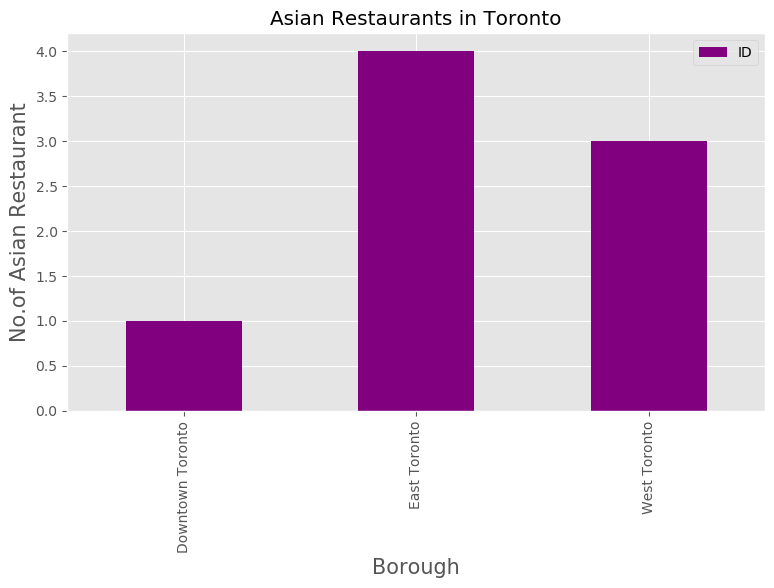

In [61]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Asian Restaurants in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Asian Restaurant', fontsize=15)
#giving a bar plot
asian_rest_to.groupby('Borough')['ID'].count().plot(kind='bar', color='purple')
#legend
plt.legend()
#displays the plot
plt.show()

In [62]:
asian_rest_to[asian_rest_to['Borough']=='East Toronto']

,Borough,Neighborhood,ID,Name
1,East Toronto,The Beaches,4c535e4afd2ea593856b4f28,The Goof
2,East Toronto,The Beaches,4dbc53541e72b351caafda72,Seaspray Restaurant
6,East Toronto,"The Danforth West, Riverdale",4adcb1a9f964a520d52e21e3,Danforth Dragon Restaurant
7,East Toronto,"India Bazaar, The Beaches West",5859d15c1d21ba53f2f9b4ef,Lake Inez


In [67]:
def get_venue_details(venue_id):
        
    CLIENT_ID = 'FM32E0UU4KR1WU4VZIG1F5G1J2XFMKEGNF52UGPTSQ1J1CF1'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='R5SUZ4FBHNDVUMHP15ZKFIKI5VCQBLGPYSFGZY2LYQXMILX2' # Foursquare Secret, note there is a daily call quota it it
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [68]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in asian_rest_to.values.tolist():
    Borough,Neighborhood,ID,Name=row

    # prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
asian_rest_details=pd.DataFrame(columns=column_names)
count=1


for row in asian_rest_to.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(asian_rest_to),')','processed')
    asian_rest_details = asian_rest_details.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID   Name  Likes  Rating  Tips
0  50e88fc6e4b007fcbb57aae8  Izumi     18     7.7     4
( 1 / 8 ) processed
                         ID      Name  Likes  Rating  Tips
0  4c535e4afd2ea593856b4f28  The Goof     10     6.3     6
( 2 / 8 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4dbc53541e72b351caafda72
( 3 / 8 ) processed
                         ID           Name  Likes  Rating  Tips
0  4af369d0f964a52060ed21e3  Foxley Bistro     71     8.9    53
( 4 / 8 ) processed
                         ID     Name  Likes  Rating  Tips
0  54c46166498edeaa806cabc8  Hanmoto     82     8.6    22
( 5 / 8 ) processed
                         ID            Name  Likes  Rating  Tips
0  58b0e82d5d6ec60662cbda46  Pinky's Ca Phe     39     9.1    10
( 6 / 8 ) processed
                         ID                        Name  Likes  Rating  Tips
0  4adcb1a9f964a520d52e21e3  Danforth Dragon Restaurant      6     7.9    12
( 7 

In [69]:
asian_rest_details.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Downtown Toronto,"Regent Park, Harbourfront",50e88fc6e4b007fcbb57aae8,Izumi,18,7.7,4
1,East Toronto,The Beaches,4c535e4afd2ea593856b4f28,The Goof,10,6.3,6
2,East Toronto,The Beaches,0,0,0,0.0,0
3,West Toronto,"Little Portugal, Trinity",4af369d0f964a52060ed21e3,Foxley Bistro,71,8.9,53
4,West Toronto,"Little Portugal, Trinity",54c46166498edeaa806cabc8,Hanmoto,82,8.6,22


In [72]:
asian_rest_details.sort_values(['Rating'],ascending=False).head(10)

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
5,West Toronto,"Little Portugal, Trinity",58b0e82d5d6ec60662cbda46,Pinky's Ca Phe,39,9.1,10
3,West Toronto,"Little Portugal, Trinity",4af369d0f964a52060ed21e3,Foxley Bistro,71,8.9,53
7,East Toronto,"India Bazaar, The Beaches West",5859d15c1d21ba53f2f9b4ef,Lake Inez,34,8.9,7
4,West Toronto,"Little Portugal, Trinity",54c46166498edeaa806cabc8,Hanmoto,82,8.6,22
6,East Toronto,"The Danforth West, Riverdale",4adcb1a9f964a520d52e21e3,Danforth Dragon Restaurant,6,7.9,12
0,Downtown Toronto,"Regent Park, Harbourfront",50e88fc6e4b007fcbb57aae8,Izumi,18,7.7,4
1,East Toronto,The Beaches,4c535e4afd2ea593856b4f28,The Goof,10,6.3,6
2,East Toronto,The Beaches,0,0,0,0.0,0


In [75]:
rest_ratings=asian_rest_details.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
rest_ratings.columns=['Neighborhood','Average Rating']
rest_ratings.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
0,"India Bazaar, The Beaches West",8.900000
1,"Little Portugal, Trinity",8.866667
4,"The Danforth West, Riverdale",7.900000
2,"Regent Park, Harbourfront",7.700000
3,The Beaches,3.150000


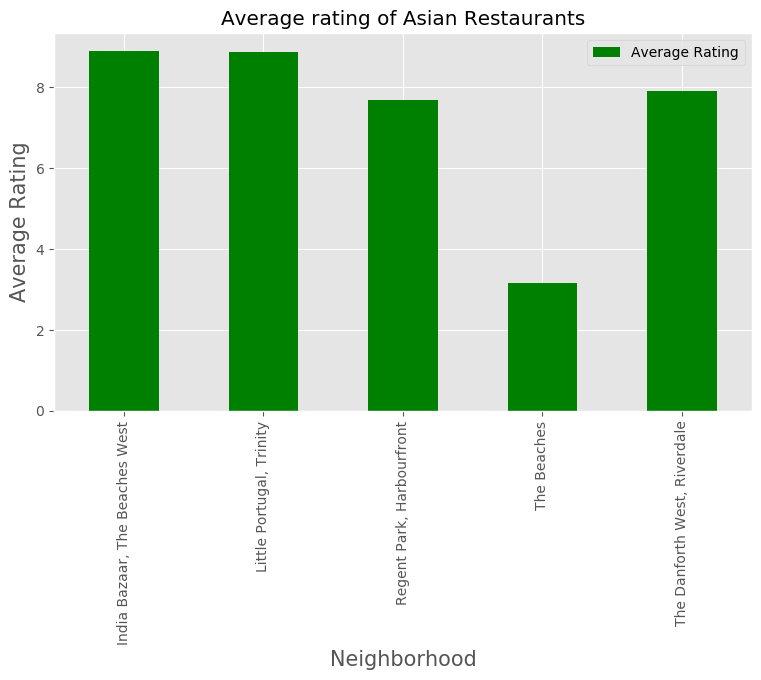

In [80]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Asian Restaurants')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
rest_ratings.groupby('Neighborhood').mean()['Average Rating'].plot(kind='bar', color = 'green')
#legend
plt.legend()
#displays the plot
plt.show()